In [ ]:
#GLM (Logistic Regression)

In [ ]:
# Python에서 logistic regression을 할 때는 패키지를 이용한다. 

In [ ]:
#StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형 Logit 를 제공한다. 

In [ ]:
#Scikit-Learn 패키지는 로지스틱 회귀 모형 LogisticRegression 를 제공한다.

In [2]:
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn
import statsmodels.api as sm
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

C:\Users\rladh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\rladh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
#Michelin 가이드 평점 예측

In [80]:
#다음 데이터는 뉴욕시의 개별 레스토랑의 고객 평가 점수와 Michelin 가이드 수록 여부를 보인 것이다.

In [81]:
#InMichelin: Michelin 가이드 수록 여부
#ant Name: 레스토랑 이름
#Food: 식사에 대한 고객 평가 점수 (1~30)
#Decor: 인테리어에 대한 고객 평가 점수 (1~30)
#Service: 서비스에 대한 고객 평가 점수 (1~30)
#Price: 저녁 식사 가격 (US$)

In [3]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")

In [33]:
df.head()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
0,0,14 Wall Street,19,20,19,50
1,0,212,17,17,16,43
2,0,26 Seats,23,17,21,35
3,1,44,19,23,16,52
4,0,A,23,12,19,24


In [34]:
df.describe()

,InMichelin,Food,Decor,Service,Price
count,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.451220,21.243902,19.164634,19.701220,50.097561
std,0.499139,2.776152,3.792594,3.263819,22.129352
min,0.000000,15.000000,12.000000,13.000000,13.000000
25%,0.000000,19.000000,16.000000,17.000000,39.000000
50%,0.000000,21.000000,19.000000,19.000000,45.000000
75%,1.000000,23.000000,22.000000,21.250000,53.000000
max,1.000000,28.000000,28.000000,28.000000,201.000000


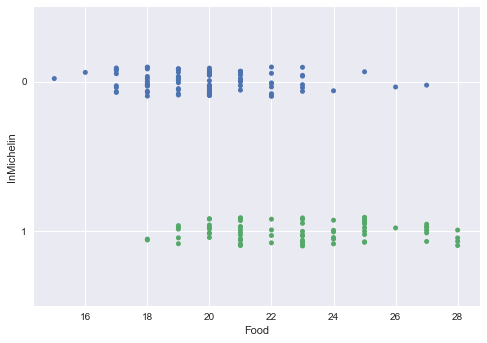

In [44]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h')
plt.grid(True)
#0,1에 해당하는 직선을 그려준다.
plt.show()
#스캐터 플롯처럼 모든 데이터를 점으로 그려준다. 
#jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 한다.
#미슐랭에 실린 음식점들이 점수가 높아보인다.

In [46]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
#위와 같이 직접 모형을 쓰는 방법도 있다.

In [47]:
result = model.fit(disp=0)

In [48]:
print(result.summary())
#가격과 음식점수가 미슐랭 선정에 큰 요인으로 볼 수 있다.

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Mar 2018   Pseudo R-squ.:                  0.3428
Time:                        16:30:11   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

In [49]:
np.exp(result.params)#오즈비 계산

Intercept    0.000014
Food         1.499073
Decor        1.105141
Service      0.824957
Price        1.096057
dtype: float64

In [50]:
df["Prediction"] = result.predict(df)
#예측값 계산

In [51]:
sns.boxplot(x="InMichelin", y="Prediction", data=df)

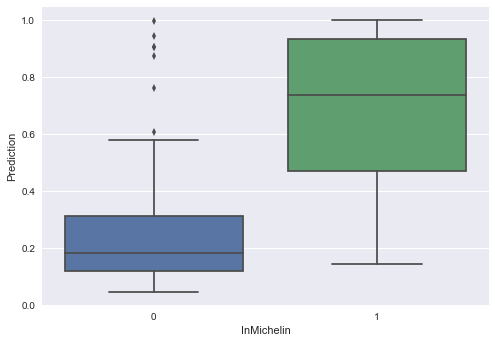

In [52]:
plt.show()
#예측값이 대략적으로 맞아 떨어진다고 할 수 있다.